# Preliminary Study

## Sentiment Analysis

###### Aaron Bromeland

### Needed Imports

In [3]:
import pandas as pd
from afinn import Afinn
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#!pip3 install pysentiment2
import pysentiment2 as ps

### Load Data Sets

- Initial loading of data was turned in with the project proposal. Saved the data that was found to a csv so that I could load it quicker at a later time.

In [10]:
deprdf = pd.read_csv("DE_PRICE.csv")
dedf = pd.read_csv("Deere.csv")

print(f'Size of Stock price Dataframe: {deprdf.shape}')
print(f'Size of SEC document Dataframe: {dedf.shape}')

print('Example of Stock Price Dataframe:')
deprdf.head()

Size of Stock price Dataframe: (2686, 8)
Size of SEC document Dataframe: (1000, 16)
Example of Stock Price Dataframe:


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2011-10-03,63.900002,64.730003,61.630001,61.720001,49.448978,7637000
1,1,2011-10-04,60.730000,63.619999,59.919998,63.480000,50.859062,8600000
2,2,2011-10-05,63.740002,66.459999,63.099998,66.160004,53.006229,5073200
3,3,2011-10-06,65.779999,67.220001,64.580002,66.570000,53.334709,5691600
4,4,2011-10-07,67.080002,67.220001,65.000000,65.699997,52.637684,5400200


In [12]:
print('Example of SEC document Dataframe')
dedf.head()

Example of SEC document Dataframe


,Unnamed: 0,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription,text
0,0,0000315189-22-000016,2022-05-31,2022-05-26,2022-05-31T17:23:01.000Z,NaN,4/A,NaN,NaN,NaN,5012,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,\n\n\n\nSEC FORM \n 4/A\n\n\nSEC Fo...
1,1,0001558370-22-009519,2022-05-31,2022-05-31,2022-05-31T08:35:14.000Z,34.0,8-K,001-04121,22980681.0,"5.02,7.01,9.01",225690,1,1,de-20220531x8k.htm,8-K,\n\n\n\n\n\n0000315189falseDEERE & CO000031518...
2,2,0000315189-22-000015,2022-05-31,2022-05-26,2022-05-31T16:59:24.000Z,NaN,4,NaN,NaN,NaN,33968,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...
3,3,0000315189-22-000014,2022-05-31,2022-05-26,2022-05-31T14:43:18.000Z,NaN,4,NaN,NaN,NaN,59067,0,0,xslF345X03/primary_doc.xml,PRIMARY DOCUMENT,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...
4,4,0001104659-22-065984,2022-05-27,NaN,2022-05-27T16:48:50.000Z,34.0,IRANNOTICE,001-04121,22978525.0,NaN,11971,0,0,tm2217194d1_irannotice.htm,IRANNOTICE,\nIRANNOTICE\n1\ntm2217194d1_irannotice.htm\nI...


### Sentiment Analysis

 - Rand AFINN, TextBlob, VADER, and LM sentiment analzers on the documents that Deere filed with the SEC.

In [23]:
# WILL TAKE A LONG TIME TO RUN. SAVED CSV to load and save time.

df = pd.DataFrame(dedf['text'],columns=['text'])
afinn = Afinn(emoticons=True) 
df["AFINN"]=[afinn.score(s) for s in df.text]
df["TextBlob"]=[TextBlob(s).sentiment.polarity for s in df.text]
analyzer=SentimentIntensityAnalyzer()
df["VADER"]=[analyzer.polarity_scores(s)['compound'] for s in df.text]

lm = ps.LM()
df['LMTitle'] = 0
for i in range(len(df['text'])):
    tokens = lm.tokenize(df['text'][i])
    score = lm.get_score(tokens)
    df.loc[i,"LMTitle"]=score["Polarity"]

df

,text,AFINN,TextBlob,VADER,LMTitle
0,\n\n\n\nSEC FORM \n 4/A\n\n\nSEC Fo...,1.0,0.048718,0.9970,-0.142857
1,\n\n\n\n\n\n0000315189falseDEERE & CO000031518...,31.0,0.010390,0.9965,0.714286
2,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...,17.0,-0.070573,0.9987,0.043478
3,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...,27.0,-0.103780,0.9991,0.083333
4,\nIRANNOTICE\n1\ntm2217194d1_irannotice.htm\nI...,-2.0,0.078571,0.4767,-1.000000
...,...,...,...,...,...
995,\n13F-HR\n1\nsep1113f.txt\nDEERE & COMPANY 13F...,57.0,0.120599,0.9997,0.300000
996,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...,-5.0,0.041667,0.9965,-0.090909
997,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...,-6.0,0.041667,0.9966,-0.090909
998,\n\n\n\nSEC FORM \n 4\n\n\nSEC Form...,-4.0,0.041667,0.9969,-0.090909


In [24]:
# Saving Dataset
df.to_csv('DE_Sentiment_Scores.csv')

### Sentiment Visualization versus Stock Price

In [27]:
dfFinal = pd.merge(df, dedf[['filingDate','reportDate']], left_index=True, right_index=True)

In [30]:
print(dfFinal['filingDate'].dtype)
dfFinal["filingDate"]=pd.to_datetime(dfFinal["filingDate"],format="%Y-%m-%d %H:%M:%S")
dfFinal['filingDate'].dtype

object


dtype('<M8[ns]')

In [38]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
dfFinal['AFINN_SCALE'] = MinMaxScaler().fit_transform(np.array(dfFinal['AFINN']).reshape(-1,1))

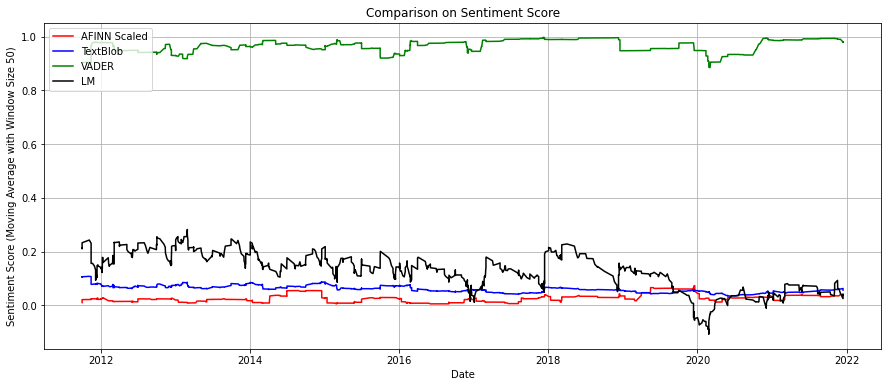

In [42]:
import matplotlib.pyplot as plt                      # a library for visualization
# inline display of plots
%matplotlib inline
plt.figure(figsize=(15, 6))

plt.plot(dfFinal.filingDate, dfFinal.AFINN_SCALE.rolling(window=50).mean(), "-r", label="AFINN Scaled")
plt.plot(dfFinal.filingDate, dfFinal.TextBlob.rolling(window=50).mean(), "-b", label="TextBlob")
plt.plot(dfFinal.filingDate, dfFinal.VADER.rolling(window=50).mean(), "-g", label="VADER")
plt.plot(dfFinal.filingDate, dfFinal.LMTitle.rolling(window=50).mean(), "-k", label="LM")


plt.legend(loc="upper left")
plt.title("Comparison on Sentiment Score")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average with Window Size 50)")
plt.grid(axis='both')
plt.show()

In [35]:
print(deprdf['Date'].dtype)
deprdf['Date']=pd.to_datetime(deprdf['Date'],format="%Y-%m-%d %H:%M:%S")
deprdf['Date'].dtype

object


dtype('<M8[ns]')

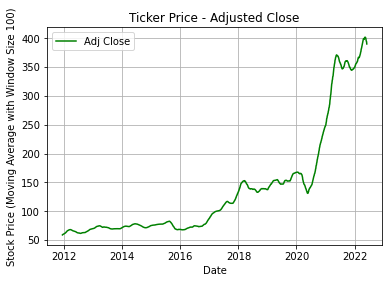

In [44]:
plt.plot(deprdf['Date'], deprdf['Adj Close'].rolling(window=50).mean(), "-g", label="Adj Close")


plt.legend(loc="upper left")
plt.title("Ticker Price - Adjusted Close")
plt.xlabel("Date")
plt.ylabel("Stock Price (Moving Average with Window Size 100)")
plt.grid(axis='both')
plt.show()